In [278]:
import preprocessingFuncts as pp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h1>This should be put in preprocessingFuncts.py</h3>


In [101]:
def getOccupationList(path="ml-100k\\u.occupation"):
    occupation_header = ["occupation"]
    rating = pd.read_csv(path,names=occupation_header)
    return rating

<h3>Reading the ratings data</h3>
Returns a pandas data frame with cleaned data from u.data

In [102]:
ratings = pp.readRatingData()
ratings = ratings.sort_values(by=['user_id','item_id']).reset_index().drop('index',axis=1)
ratings

,user_id,item_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
...,...,...,...
99995,943,1067,2
99996,943,1074,4
99997,943,1188,3
99998,943,1228,3


<h3>Reading the item data</h3>
Returns a pandas data frame with cleaned data from u.item (no title, sry, thought it's not important)

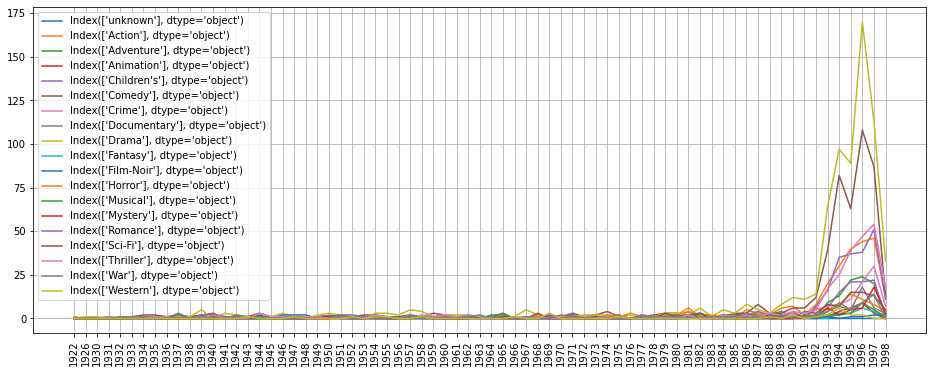

In [103]:
items = pp.readItemData()
items = items.sort_values(by=['year','item_id']).reset_index().drop('index',axis=1)
items = items.dropna()

# print(items.columns)
count=0
yearnow=0
for i in range(len(items)):
    if(yearnow!=items['year'][i]):
        count+=1
        yearnow=items['year'][i]

temp2 = items.drop('item_id',axis=1)

plt.figure(figsize=(16,6))
for i in range(2,len(temp2.columns)):
    columnname = temp2.iloc[:,i].name
    temp3 = temp2.loc[:,['year',columnname]]
    temp3 = temp3.groupby(by=['year']).sum()

    plt.title(label=temp3.columns.name,fontsize=40,loc='center')
    plt.plot(temp3.index,temp3.iloc[:,0],label = temp3.columns)
    plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()


<h3>Reading the user data</h3>
Returns a pandas data frame with cleaned data from u.user. Occupation and gender column's contents are now nominal.

In [104]:
users = pp.readUserData()
users = users.sort_values(by=['user_id','age']).reset_index().drop('index',axis=1)
users

,user_id,age,gender,occupation,zip_code,age_category
0,1,24,1,19,85711,2
1,2,53,0,13,94043,5
2,3,23,1,20,32067,2
3,4,24,1,19,43537,2
4,5,33,0,13,15213,3
...,...,...,...,...,...,...
938,939,26,0,18,33319,2
939,940,32,1,0,02215,3
940,941,20,1,18,97229,1
941,942,48,0,10,78209,4


<h1> Move this to py file </h1>
Yes, below this

In [254]:
def categorySimilarity(occup,tick,string,size=(20,20),threshold=30):
    sim = occup.pivot_table(columns=string,index='item_id',values='rating').fillna(0) #Get the pivot table
    print(sim)
    a = sim.corr(min_periods=threshold) #Get the correlation with threshold 30
    plt.figure(figsize=size) #figure the size, default = 20,20, we can set it based on what we like
    plt.set_cmap('jet') #Set the color of the box
    plt.imshow(a) #Create the matrix table
    plt.colorbar() #Show the right side color
    plt.xticks(range(0,len(tick)),tick,rotation=-90) 
    plt.yticks(range(0,len(tick)),tick)
    for i in a.columns:
        for j in a.columns:
            pass
            # print(j+" "+i)
            # print(a[j][i])
            # plt.annotate(xy=(i,j),text=str(a[j][i].round(2)),va='center',ha='center') #setting the text in each matrix box
            # plt.text(i,j,str(a[j][i].round(2)),va='center',ha='center') #setting the text in each matrix box
    print('YOYOMAMA')
    plt.show() #show the plot

<h1> Based on Occupation </h1>

occupation     0         1    2         3         4         5         6   \
item_id                                                                    
1           4.000  4.083333  3.5  3.731707  4.043478  3.454545  3.882353   
2           3.600  3.000000  0.0  3.333333  3.125000  3.500000  3.250000   
3           3.000  0.000000  0.0  2.800000  3.363636  3.000000  2.000000   
4           3.375  4.666667  3.0  3.368421  3.739130  4.000000  3.333333   
5           3.000  0.000000  0.0  2.750000  3.000000  3.200000  4.500000   
...           ...       ...  ...       ...       ...       ...       ...   
1678        0.000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
1679        0.000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
1680        0.000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
1681        0.000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
1682        0.000  0.000000  0.0  0.000000  3.000000  0.000000  0.000000   

occupation 

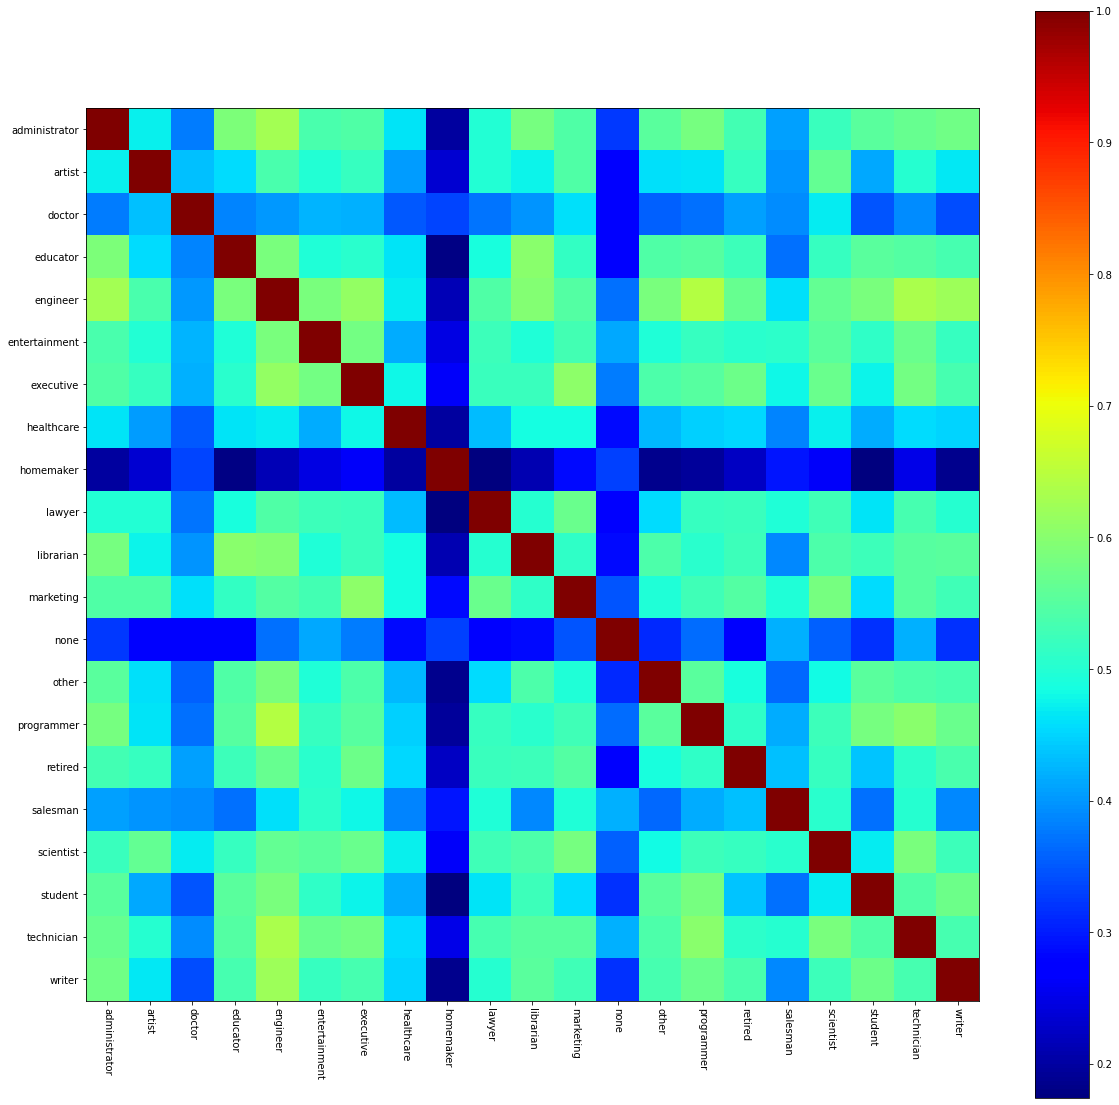

In [265]:
occup = pp.specifyByUserData(users, ratings, ["occupation"])
job = getOccupationList()
occup = occup.drop('user_id',axis=1)
occup = occup.groupby(by=['occupation','item_id']).mean()
tick = job['occupation'].tolist()
categorySimilarity(occup,tick,'occupation')

<h1>Age Category Query</h1>
For presentation, if we want to show why the accuracy for age_category 6 is really not related to 7 (it's for the function below)

In [107]:
display(users.query('age_category >=6'))

,user_id,age,gender,occupation,zip_code,age_category
105,106,61,1,15,55125,6
210,211,66,1,16,32605,6
265,266,62,0,0,78756,6
317,318,65,1,15,06518,6
348,349,68,1,15,61455,6
350,351,61,1,3,49938,6
363,364,63,1,4,01810,6
422,423,64,1,13,91606,6
480,481,73,1,15,37771,7
519,520,62,1,7,12603,6


<h1>Based on age category</h1>


age_category,0,1,2,3,4,5,6,7
age_category,,,,,,,,
0,1.000000,0.122855,0.162023,0.210687,0.152459,0.189942,0.238026,NaN
1,0.122855,1.000000,0.568230,0.501979,0.432960,0.345865,0.325144,0.203522
2,0.162023,0.568230,1.000000,0.463210,0.482713,0.378419,0.388510,0.286680
3,0.210687,0.501979,0.463210,1.000000,0.495171,0.444856,0.349656,0.302041
4,0.152459,0.432960,0.482713,0.495171,1.000000,0.432556,0.444142,0.425257
5,0.189942,0.345865,0.378419,0.444856,0.432556,1.000000,0.348271,0.204140
6,0.238026,0.325144,0.388510,0.349656,0.444142,0.348271,1.000000,-0.183828
7,NaN,0.203522,0.286680,0.302041,0.425257,0.204140,-0.183828,1.000000


a
a
a
a
a
a
a
a


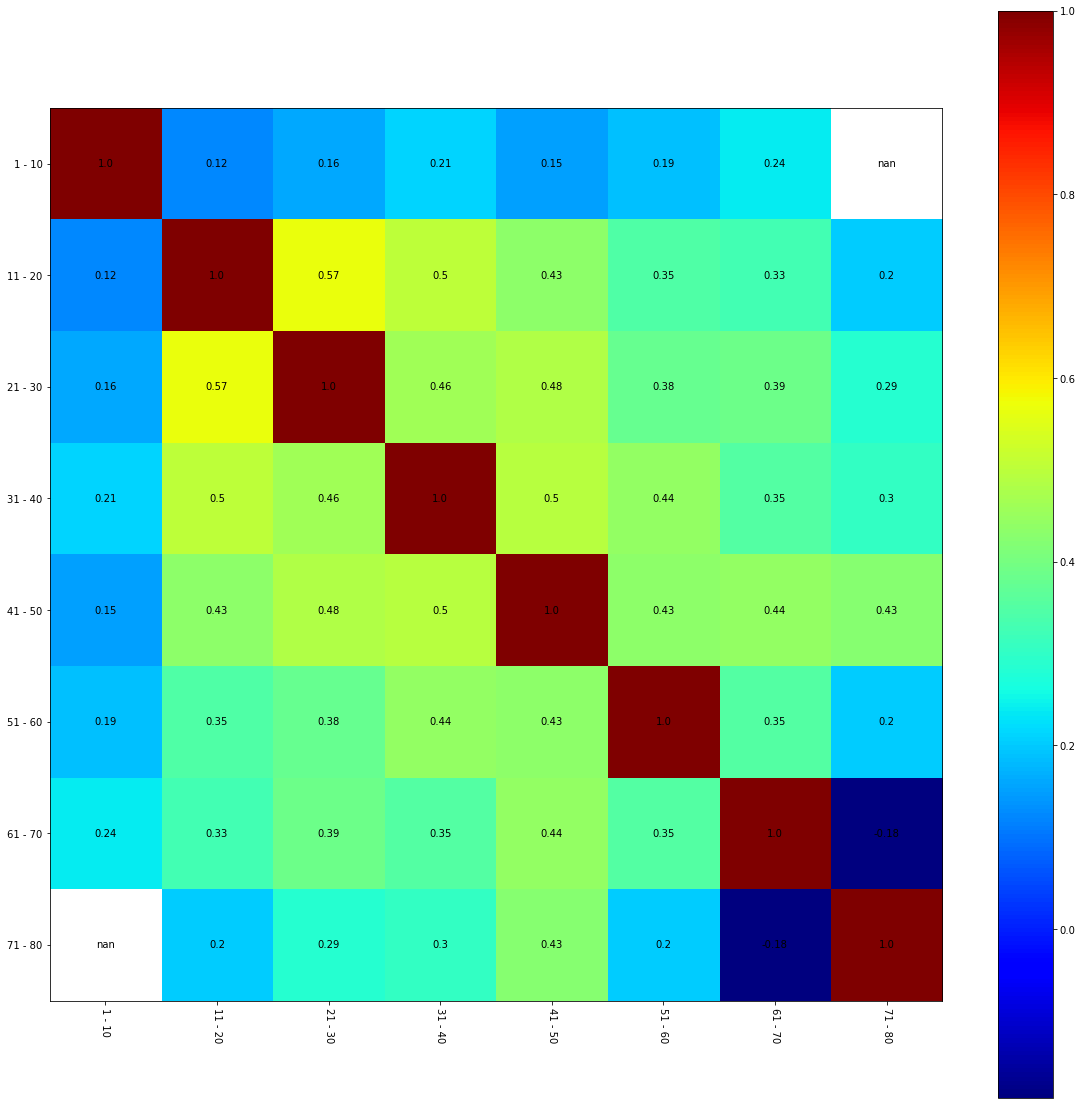

In [133]:
occup = pp.specifyByUserData(users, ratings, ["age_category"])
occup = occup.drop('user_id',axis=1)
occup = occup.groupby(by=['age_category','item_id']).mean()
# occup = occup.dropna()
age = [f"{x*10+1} - {(x+1)*10}" for x in range(0,8)]
categorySimilarity(occup,age,'age_category')

<h3>Specifying data to analyze based on user</h3>
Returns a pandas data frame with the user_id, item_id, rating and any specified category from the user attributes. takes input from user data and ratings data

gender,0,1
gender,,
0,1.000000,0.511059
1,0.511059,1.000000


a
a


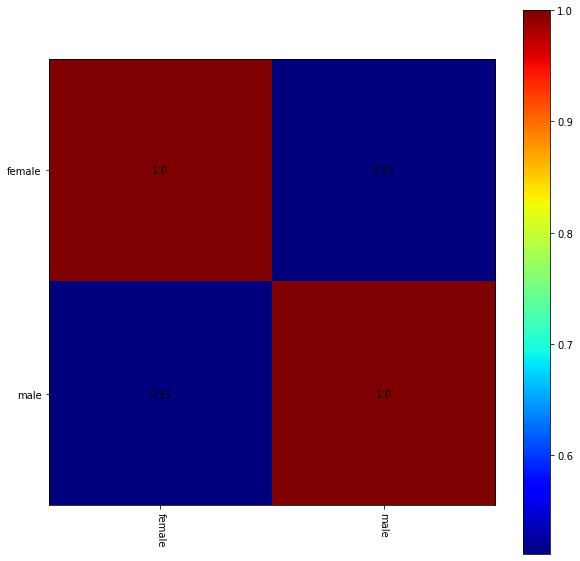

In [134]:
occup = pp.specifyByUserData(users, ratings, ["gender"])
occup
occup = occup.drop('user_id',axis=1)
occup = occup.groupby(by=['gender','item_id']).mean()
gender = ['female','male']
categorySimilarity(occup,gender,'gender',size=(10,10))

<h3>Specifying data to analyze based on item</h3>
Returns a pandas data frame with the item_id, item_id, rating and any specified category(only between "year" and "genre") from the item attributes, takes input from user data and ratings data

                rating
year item_id          
1922 675      3.555556
1926 1542     3.000000
1930 617      3.777778
1931 656      4.000000
1932 1124     3.833333
...                ...
1998 1670     3.000000
     1671     1.000000
     1678     1.000000
     1679     3.000000
     1680     2.000000

[1681 rows x 1 columns]
year     1922  1926  1930  1931  1932  1933  1934  1935  1936  1937  ...  \
item_id                                                              ...   
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1678      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 

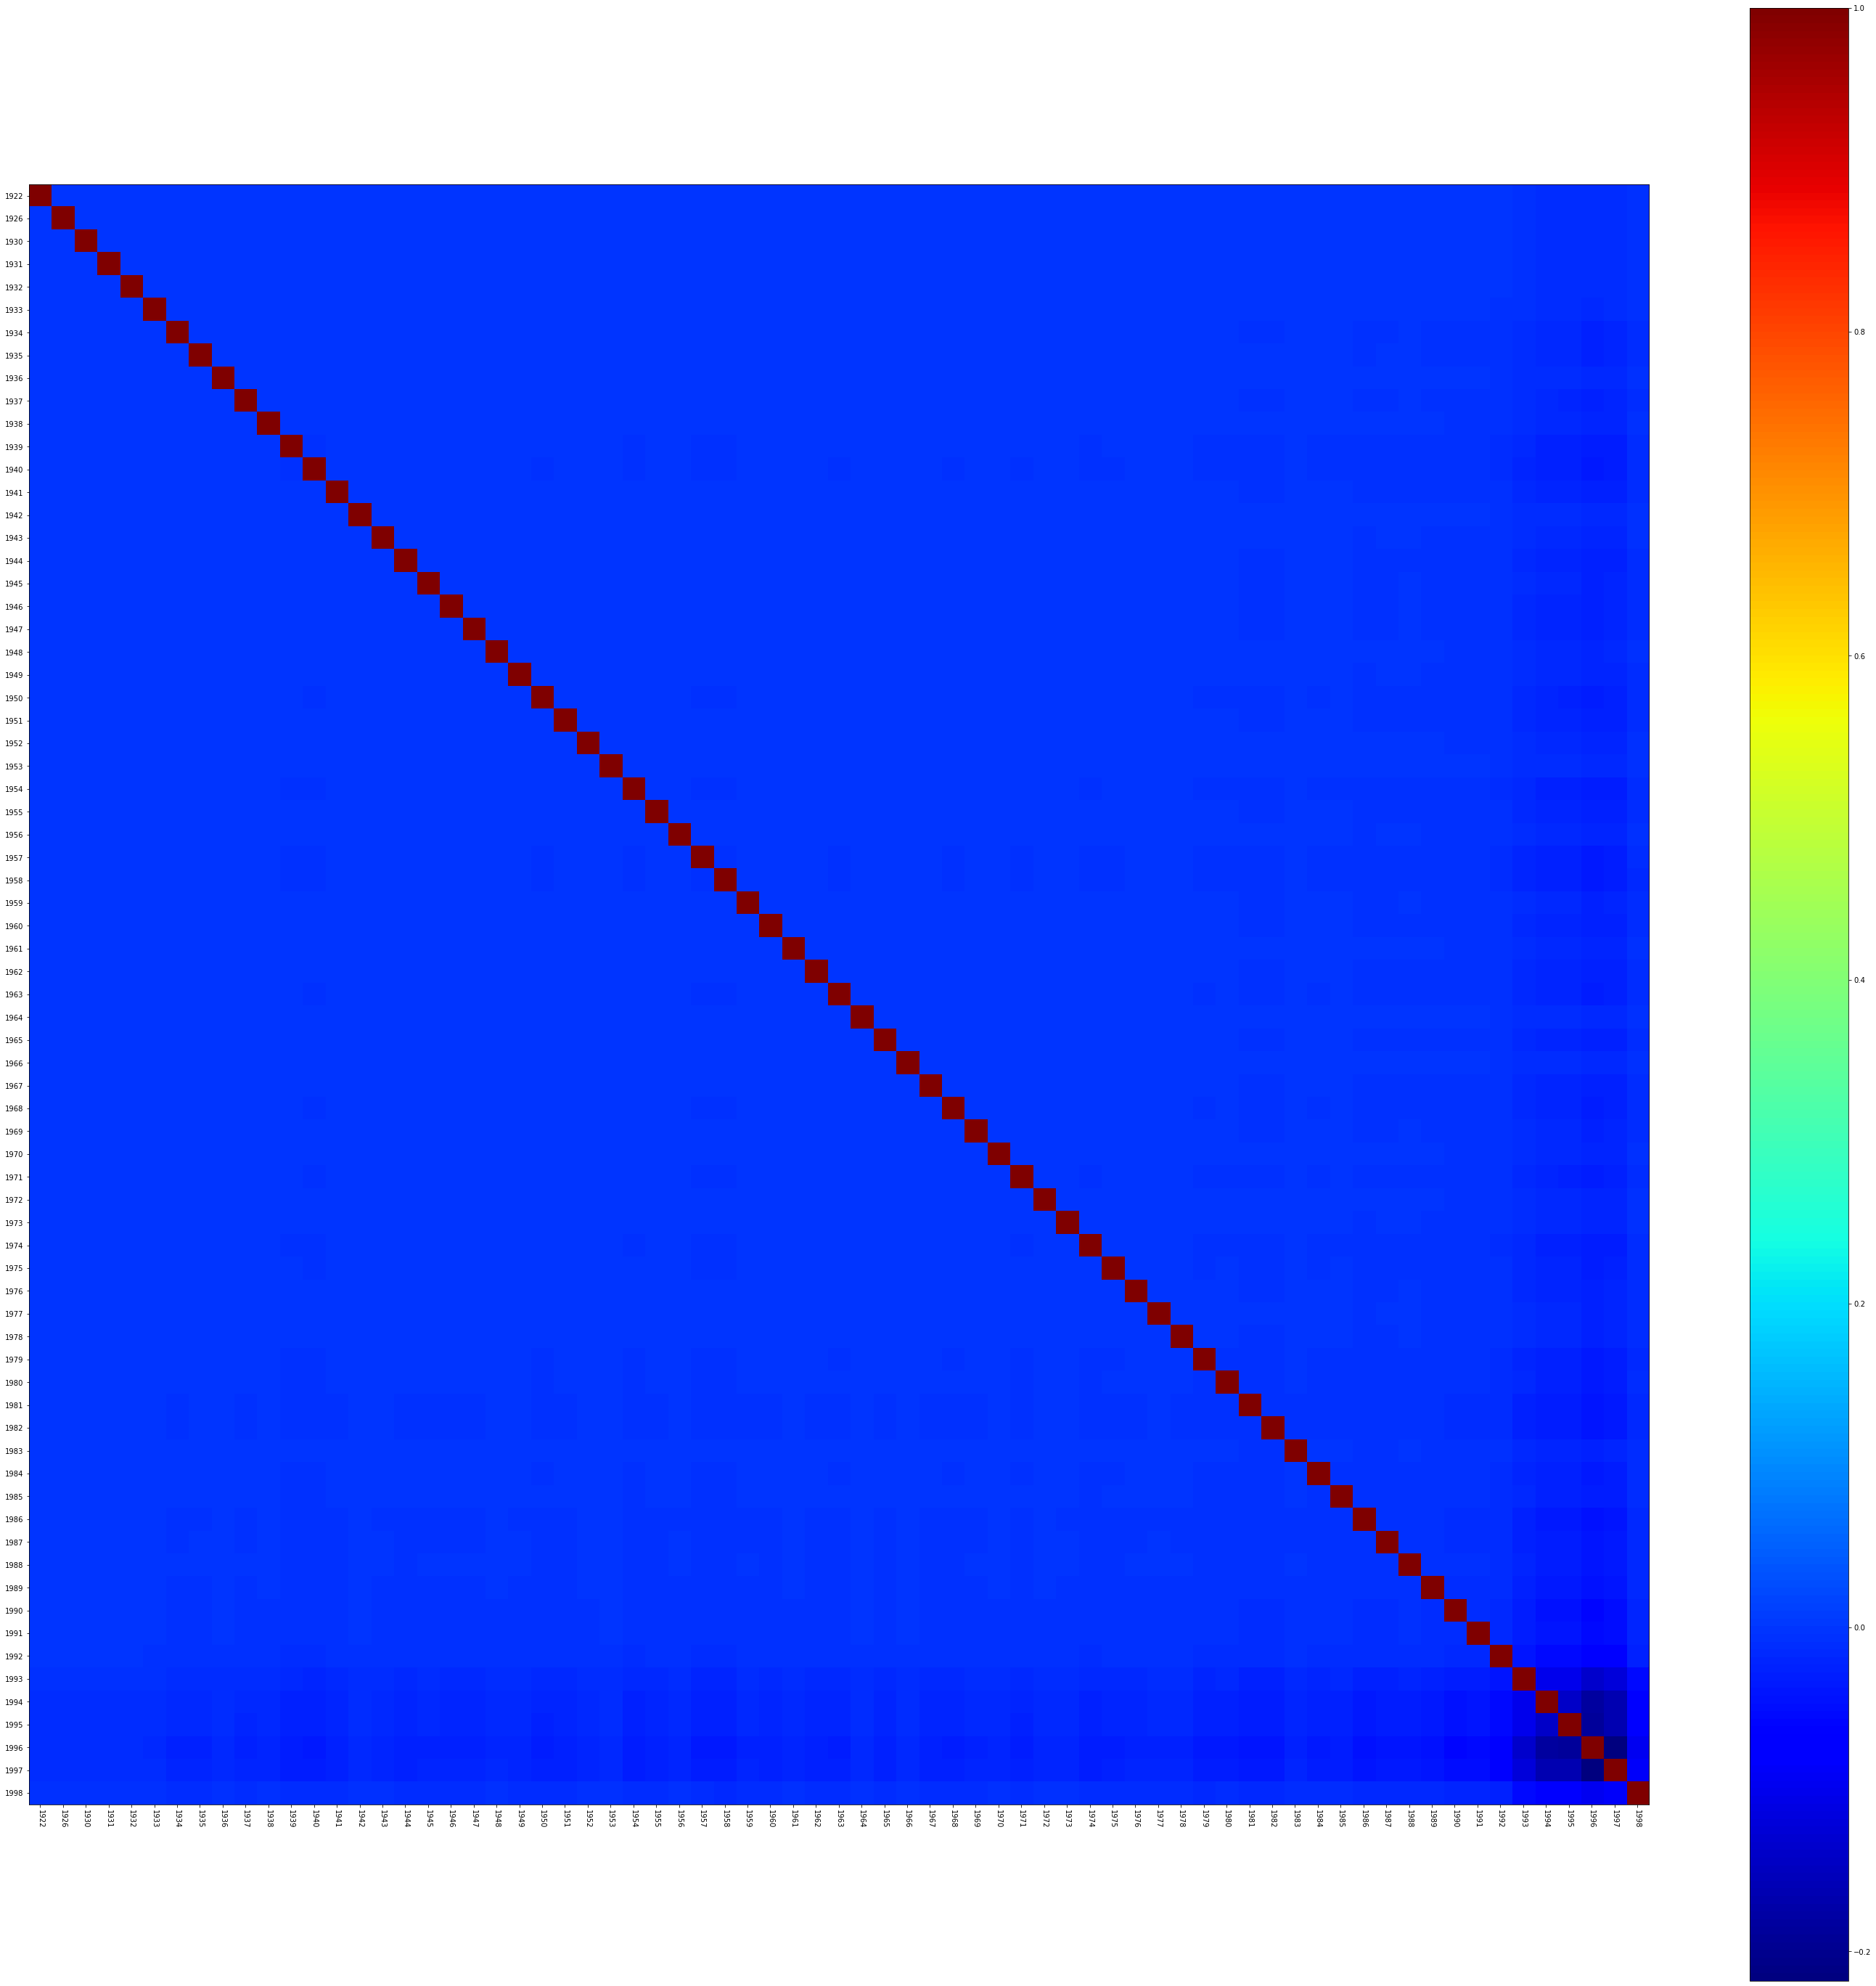

In [295]:
occup = saveyear = pp.specifyByItemData(items, ratings, "year")
occup = occup.drop('user_id',axis=1)
occupone = occup.groupby(by=['year','item_id']).mean()
print(occupone)



#saving only the year list
saveyear = saveyear['year'].drop_duplicates().reset_index().drop('index',axis=1)
saveyeartext = saveyear['year'].tolist()
categorySimilarity(occup,saveyeartext,'year',size=(50,50),threshold=0)